In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay,
                             auc,
                             roc_auc_score,
                             roc_curve,
                             f1_score,
                             recall_score,
                             precision_score,
                             classification_report)


%matplotlib inline

In [6]:
df_train_og = pd.read_csv('df_train_enc_scal_og.csv')
df_train_og.head(2)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,1.0,0.0,1.0,0.0,0.0,1.0,0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,0.0,0.0,1.0,1.0,0.0,0.0,1


In [45]:
df_test_og = pd.read_csv('df_test_enc_scal_og.csv')
df_test_og.head(2)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,0.677176,-0.212165,0.401834,-0.418725,-0.568591,1.096647,0.092492,-0.182402,0.0,0.0,1.0,1.0,1.0,0.0,0
1,-0.785689,0.754554,-0.582751,-0.429799,1.846927,0.911802,-1.410626,1.039153,1.0,0.0,1.0,1.0,1.0,0.0,0


In [11]:
X_train,y_train = df_train_og.drop('booking_complete',axis=1),df_train_og['booking_complete']
X_test,y_test = df_test_og.drop('booking_complete',axis=1),df_test_og['booking_complete']

In [46]:
df_test_og.shape

(10000, 15)

## Default Model training and evaluation

In [127]:
# Define the models
models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBClassifier': XGBClassifier(),
    'SVM': svm.SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    
}



In [58]:


# Function to train the models
def train_models(models, X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train)
    return models



In [30]:
def evaluate_models(models, X_test, y_test):
    model_names = []
    accuracy_scores = []
    recall_scores = []
    roc_auc_scores = []
    precision_scores = []
    f1_scores = []

    for name, model in models.items():
        y_pred = model.predict(X_test)

        # Print and plot the confusion matrix
        print(f"Confusion Matrix for {name}:")
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='all')

        # Print the classification report
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, y_pred))

        # Plot the ROC AUC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        model_names.append(name)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))

    # Create a DataFrame for the results
    results_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy': accuracy_scores,
        'Recall': recall_scores,
        'ROC AUC': roc_auc_scores,
        'Precision': precision_scores,
        'F1 Score': f1_scores
    })

    return results_df

In [14]:
model_trained = train_models(models,X_train,y_train)

Confusion Matrix for RandomForestClassifier:
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.17      0.26      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.57      0.59     10000
weighted avg       0.82      0.86      0.82     10000



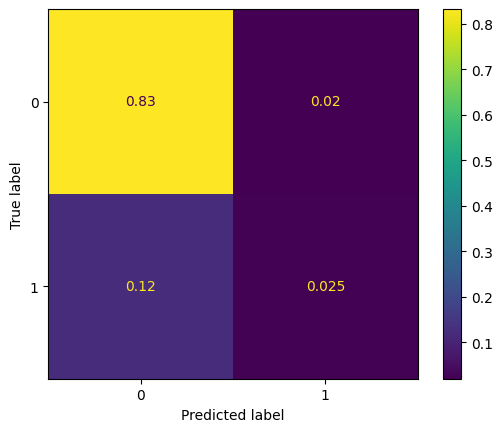

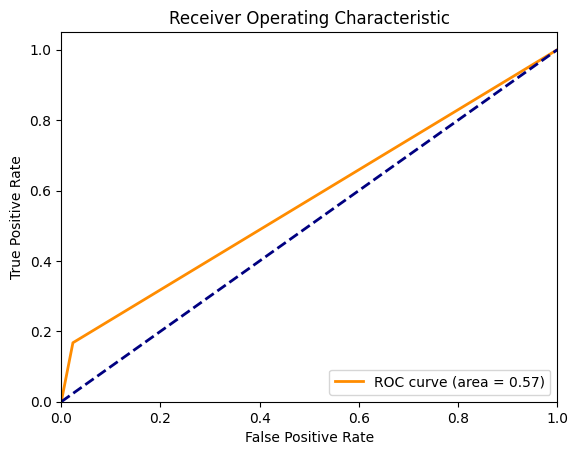

Confusion Matrix for GradientBoostingClassifier:
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.61      0.09      0.16      1480

    accuracy                           0.86     10000
   macro avg       0.74      0.54      0.54     10000
weighted avg       0.83      0.86      0.81     10000



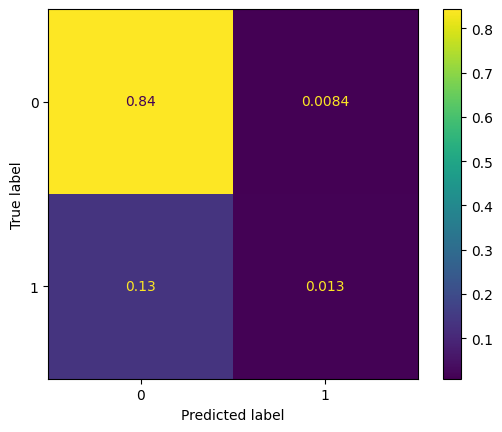

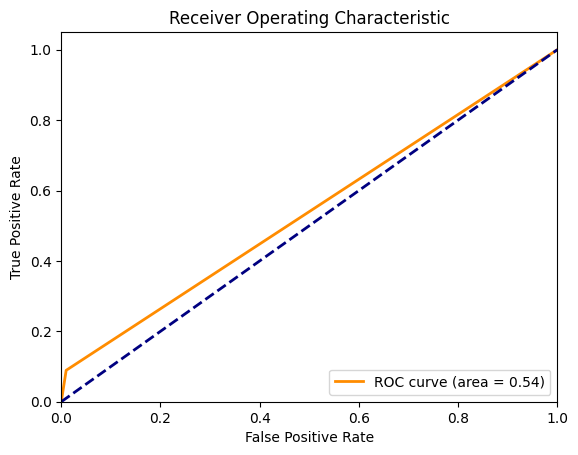

Confusion Matrix for ExtraTreesClassifier:
Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      8520
           1       0.47      0.18      0.26      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.57      0.59     10000
weighted avg       0.81      0.85      0.82     10000



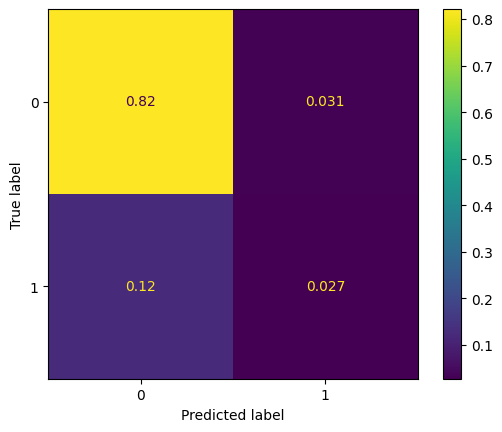

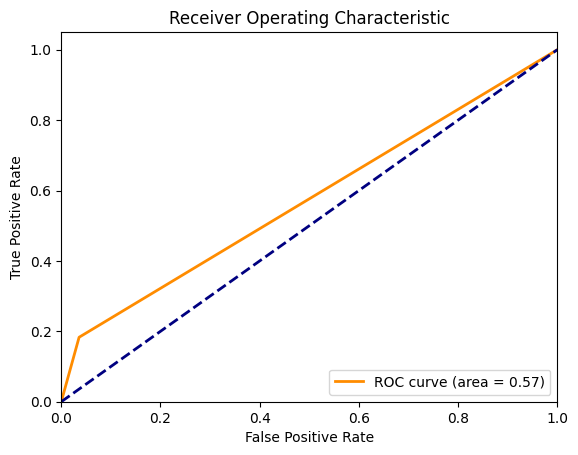

Confusion Matrix for LogisticRegression:
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.46      0.11      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.66      0.54      0.55     10000
weighted avg       0.80      0.85      0.81     10000



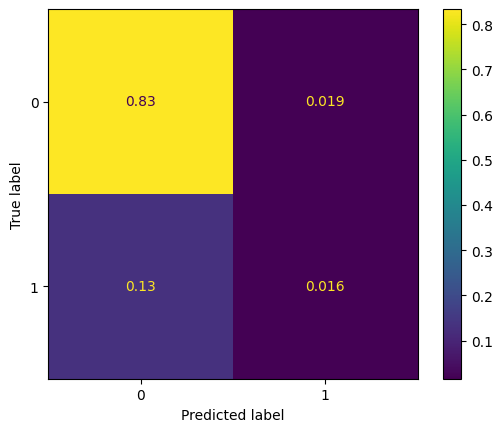

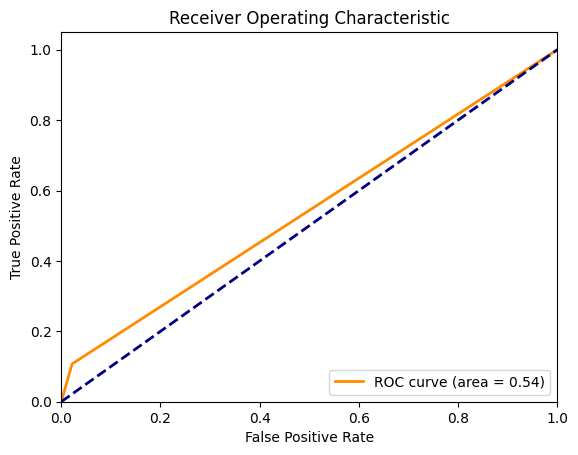

Confusion Matrix for XGBClassifier:
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.50      0.15      0.23      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.56      0.57     10000
weighted avg       0.81      0.85      0.82     10000



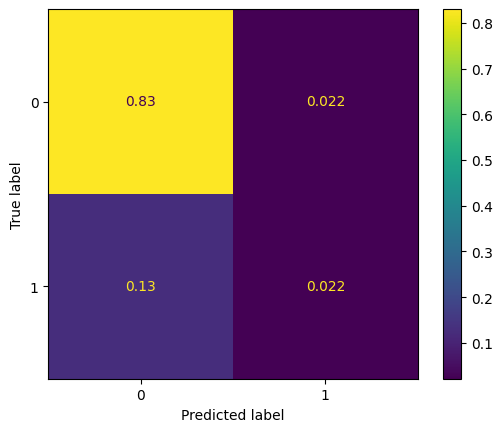

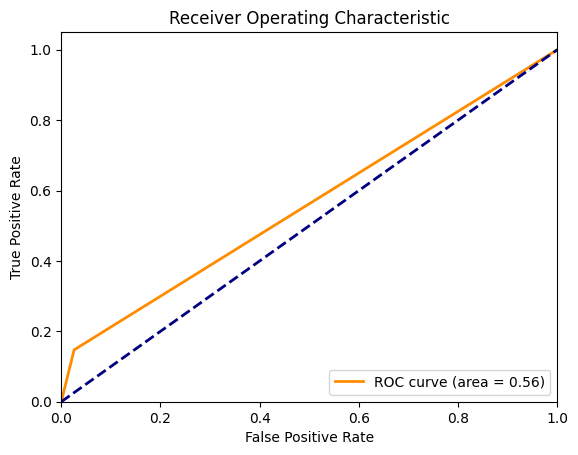

In [33]:
results_df = evaluate_models(model_trained, X_test, y_test)

In [25]:
results_df

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8568,0.167568,0.572047,0.553571,0.257261
1,GradientBoostingClassifier,0.8568,0.089189,0.539665,0.611111,0.155660
2,ExtraTreesClassifier,0.8485,0.183108,0.573596,0.469671,0.263491
3,LogisticRegression,0.8493,0.107432,0.542801,0.460870,0.174247
4,XGBClassifier,0.8518,0.147297,0.560738,0.497717,0.227320


## SMOTE dataset training

In [49]:
df_train_smote = pd.read_csv('df_train_enc_scal_smote.csv')
df_train_smote.head(2)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,1.0,0.0,1.0,0.0,0.0,1.0,0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,0.0,0.0,1.0,1.0,0.0,0.0,1


In [50]:
df_train_smote['booking_complete'].value_counts()

0    34002
1    34002
Name: booking_complete, dtype: int64

In [51]:
X_train_smote,y_train_smote = df_train_smote.drop('booking_complete',axis=1),df_train_smote['booking_complete']

In [59]:
smote_model_train = train_models(models,X_train_smote,y_train_smote)

Confusion Matrix for RandomForestClassifier:
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8520
           1       0.43      0.31      0.36      1480

    accuracy                           0.84     10000
   macro avg       0.66      0.62      0.63     10000
weighted avg       0.82      0.84      0.83     10000



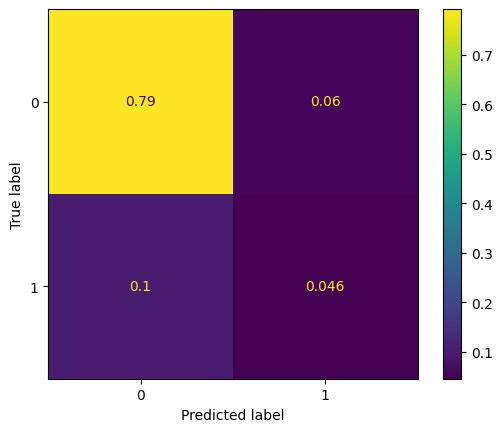

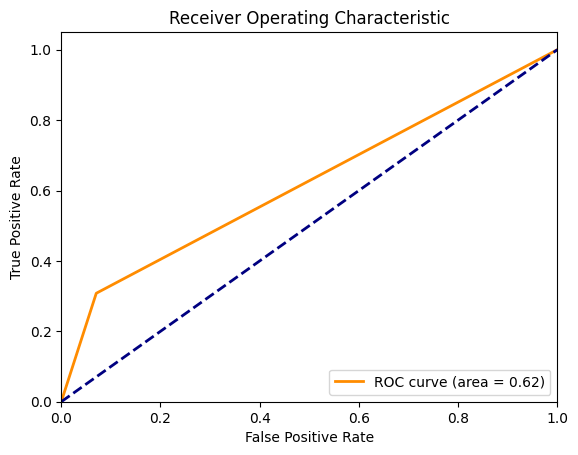

Confusion Matrix for GradientBoostingClassifier:
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      8520
           1       0.38      0.49      0.43      1480

    accuracy                           0.80     10000
   macro avg       0.64      0.68      0.65     10000
weighted avg       0.83      0.80      0.81     10000



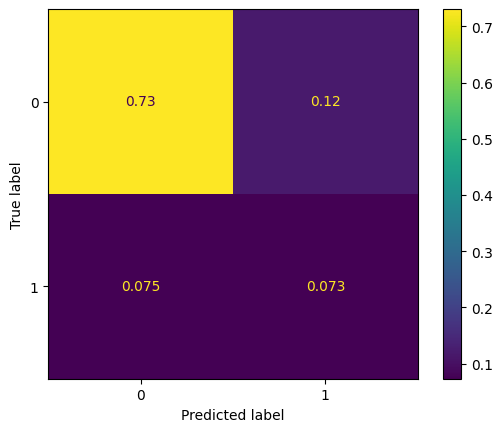

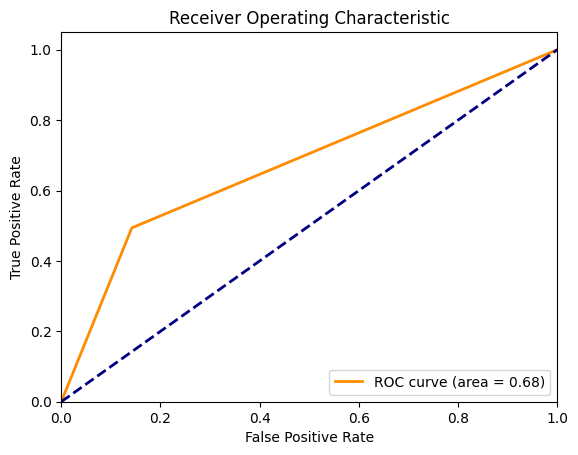

Confusion Matrix for ExtraTreesClassifier:
Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8520
           1       0.43      0.31      0.36      1480

    accuracy                           0.84     10000
   macro avg       0.66      0.62      0.63     10000
weighted avg       0.82      0.84      0.83     10000



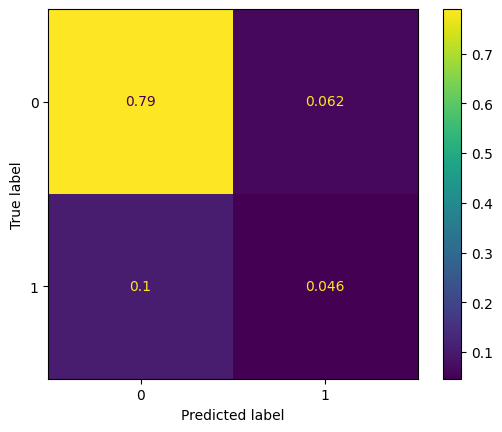

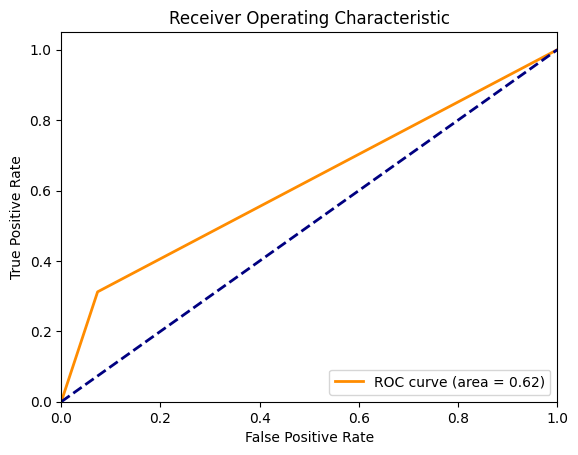

Confusion Matrix for LogisticRegression:
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      8520
           1       0.32      0.69      0.43      1480

    accuracy                           0.73     10000
   macro avg       0.62      0.71      0.63     10000
weighted avg       0.84      0.73      0.77     10000



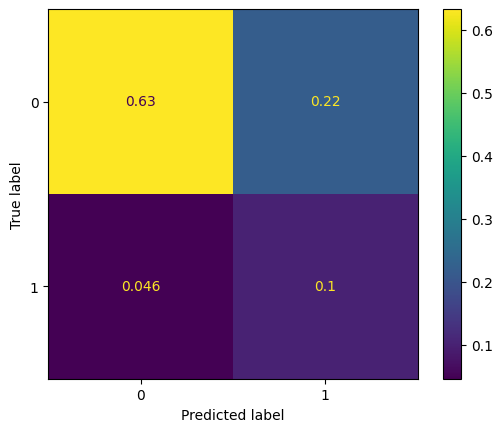

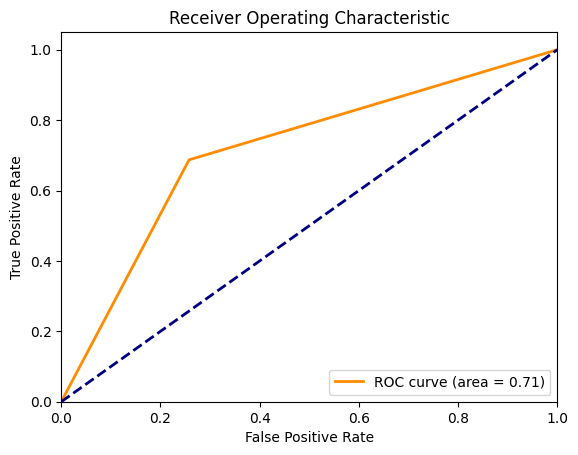

Confusion Matrix for XGBClassifier:
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.48      0.19      0.27      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.58      0.59     10000
weighted avg       0.81      0.85      0.82     10000



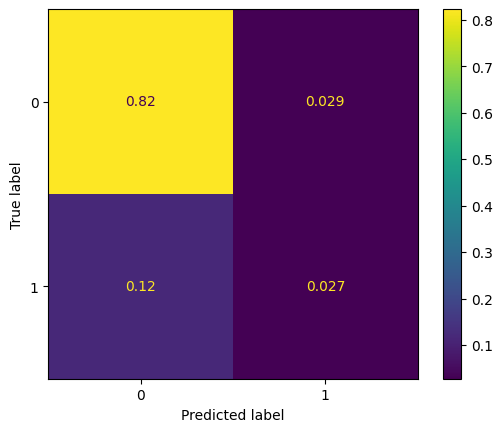

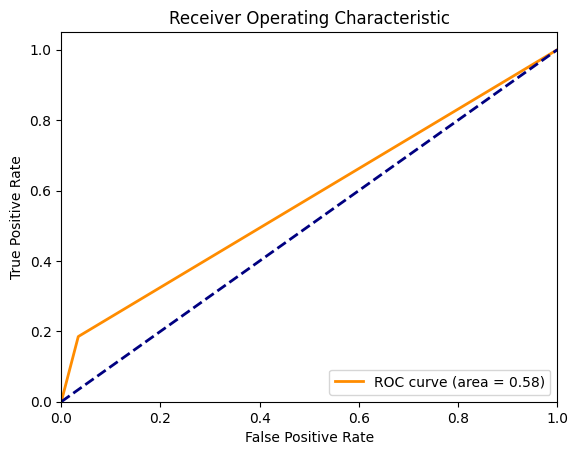

In [60]:
results_df_smote = evaluate_models(smote_model_train, X_test, y_test)

* After smote result

In [61]:
results_df_smote

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8375,0.308108,0.618784,0.431410,0.359480
1,GradientBoostingClassifier,0.8039,0.493919,0.675833,0.376222,0.427111
2,ExtraTreesClassifier,0.8358,0.312162,0.619461,0.425414,0.360094
3,LogisticRegression,0.7342,0.687162,0.714767,0.316625,0.433504
4,XGBClassifier,0.8502,0.185135,0.575431,0.484099,0.267840


* Before smote result

In [62]:
results_df

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8568,0.167568,0.572047,0.553571,0.257261
1,GradientBoostingClassifier,0.8568,0.089189,0.539665,0.611111,0.155660
2,ExtraTreesClassifier,0.8485,0.183108,0.573596,0.469671,0.263491
3,LogisticRegression,0.8493,0.107432,0.542801,0.460870,0.174247
4,XGBClassifier,0.8518,0.147297,0.560738,0.497717,0.227320


### Insight:
* Compared to earlier report that was without smote, we can see that recall and ROC score has improved witha  little drop in accuracy.

## Model training with new columns plus smote

In [149]:
df_train_smote_newcol = pd.read_csv('new_cols_smote/df_train_smote_newcols.csv')

In [150]:
df_train_smote_newcol.head()

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,is_weekday,is_weekend,booking_complete
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,-0.388061,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
2,-0.609062,-0.461472,0.401834,1.275615,-0.508949,-0.751808,-0.408547,-0.436058,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
3,0.468009,-0.921484,-0.582751,-0.064353,-0.061631,0.357265,1.094570,0.872274,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
4,-0.418481,-0.461472,-0.582751,0.223574,-0.091452,-0.566963,1.595610,-0.436058,0.608756,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0


In [162]:
X_train_smotenewcol,y_train_smotenewcol = df_train_smote_newcol.drop('booking_complete',axis=1),df_train_smote_newcol['booking_complete']

In [154]:
df_test_newcol = pd.read_csv('new_cols_smote/df_test_processed_newcols.csv')

In [163]:
X_test_newcol,y_test_newcol = df_test_newcol.drop('booking_complete',axis=1),df_test_newcol['booking_complete']

In [164]:
X_train_smotenewcol.shape, X_test_newcol.shape

((68004, 17), (10000, 17))

In [165]:
smote_newcols_model_train = train_models(models,X_train_smotenewcol,y_train_smotenewcol)

C:\Users\Swamesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for RandomForestClassifier:
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8520
           1       0.42      0.31      0.36      1480

    accuracy                           0.83     10000
   macro avg       0.65      0.62      0.63     10000
weighted avg       0.82      0.83      0.82     10000



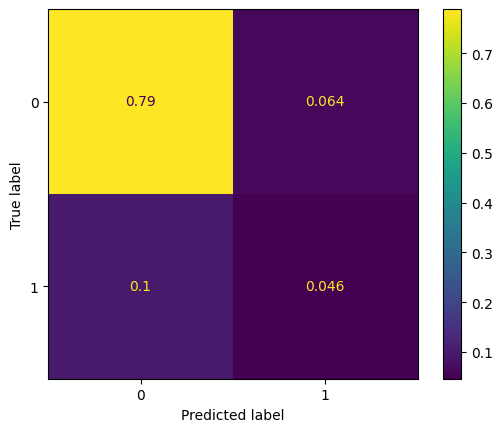

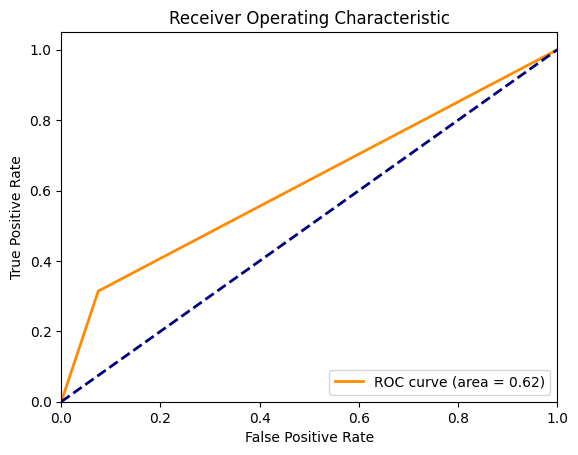

Confusion Matrix for GradientBoostingClassifier:
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      8520
           1       0.37      0.48      0.42      1480

    accuracy                           0.80     10000
   macro avg       0.64      0.67      0.65     10000
weighted avg       0.83      0.80      0.81     10000



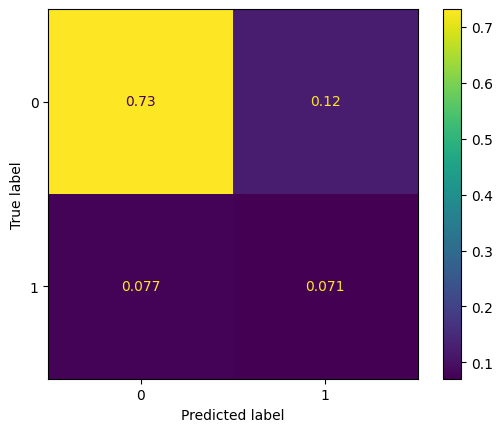

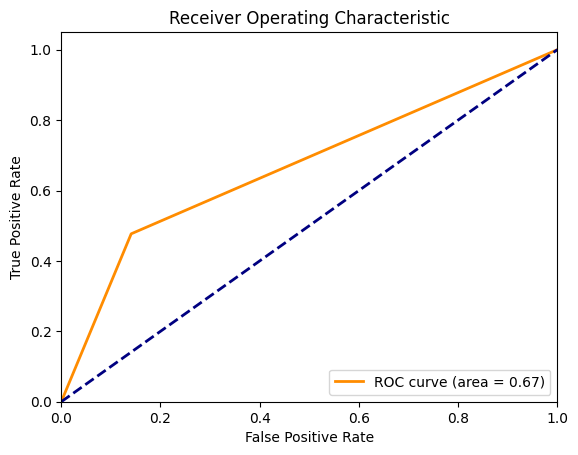

Confusion Matrix for ExtraTreesClassifier:
Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8520
           1       0.40      0.32      0.36      1480

    accuracy                           0.83     10000
   macro avg       0.64      0.62      0.63     10000
weighted avg       0.81      0.83      0.82     10000



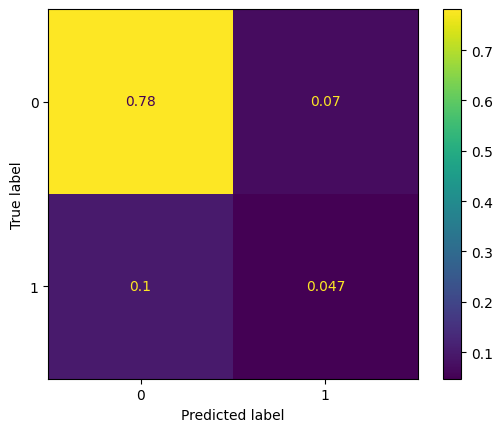

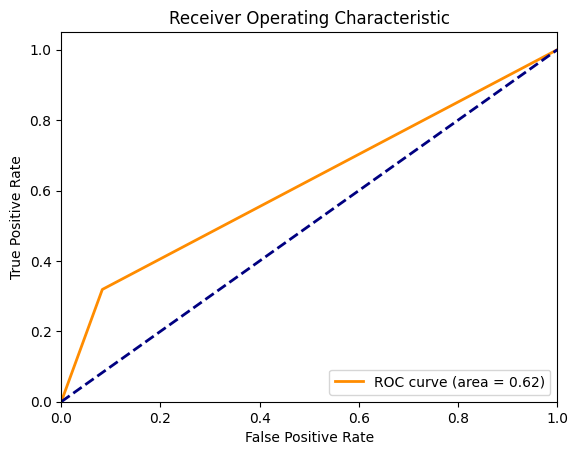

Confusion Matrix for LogisticRegression:
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      8520
           1       0.32      0.69      0.43      1480

    accuracy                           0.73     10000
   macro avg       0.62      0.71      0.63     10000
weighted avg       0.84      0.73      0.77     10000



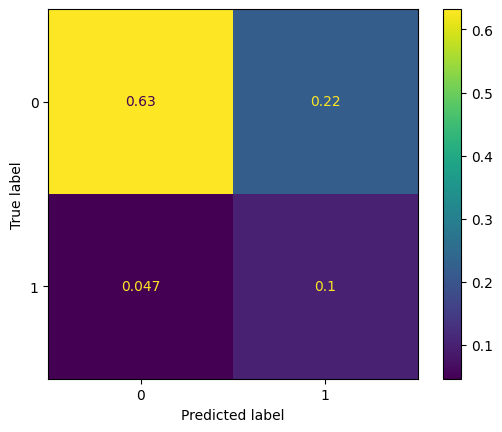

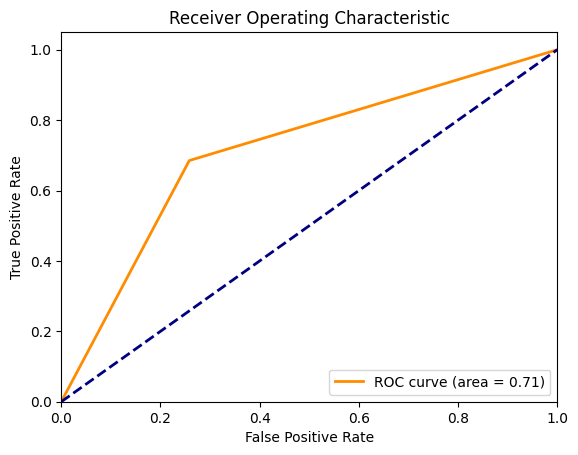

Confusion Matrix for XGBClassifier:
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8520
           1       0.46      0.18      0.26      1480

    accuracy                           0.85     10000
   macro avg       0.66      0.57      0.59     10000
weighted avg       0.81      0.85      0.82     10000



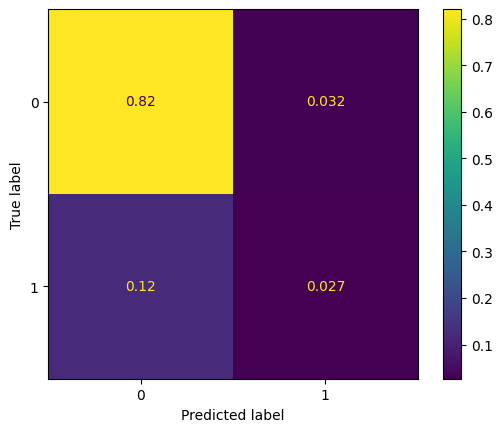

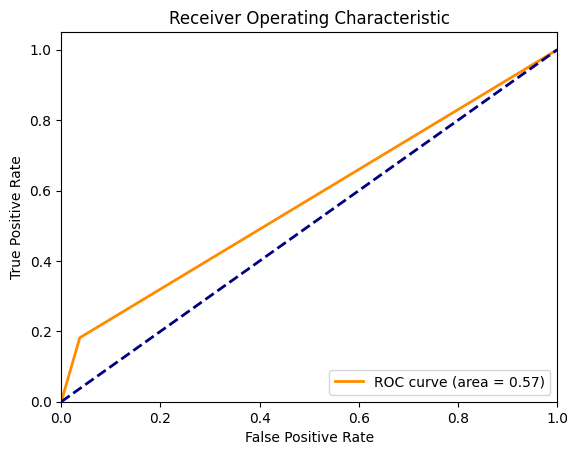

Confusion Matrix for SVM:
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      8520
           1       0.31      0.72      0.43      1480

    accuracy                           0.72     10000
   macro avg       0.62      0.72      0.62     10000
weighted avg       0.84      0.72      0.76     10000



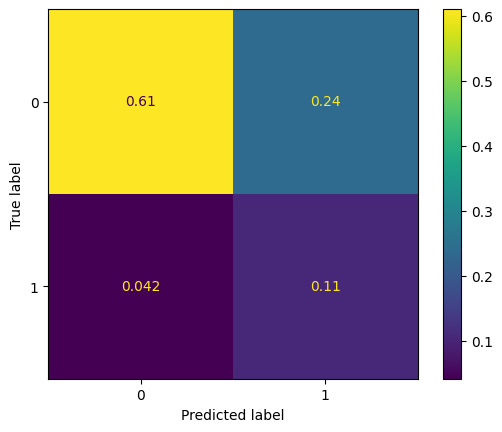

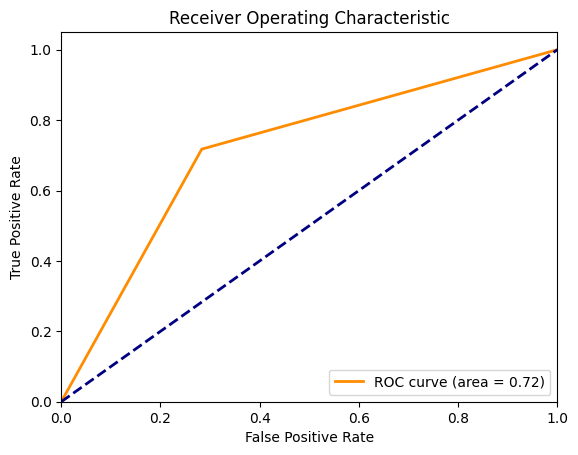

Confusion Matrix for Naive Bayes:
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.93      0.33      0.49      8520
           1       0.18      0.87      0.30      1480

    accuracy                           0.41     10000
   macro avg       0.56      0.60      0.39     10000
weighted avg       0.82      0.41      0.46     10000



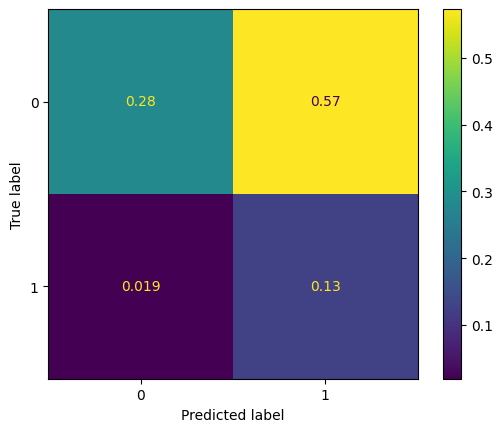

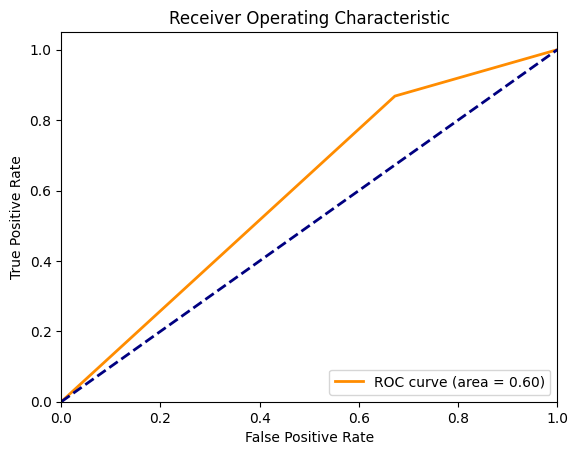

Confusion Matrix for Decision Tree:
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      8520
           1       0.29      0.35      0.32      1480

    accuracy                           0.78     10000
   macro avg       0.59      0.60      0.59     10000
weighted avg       0.79      0.78      0.78     10000



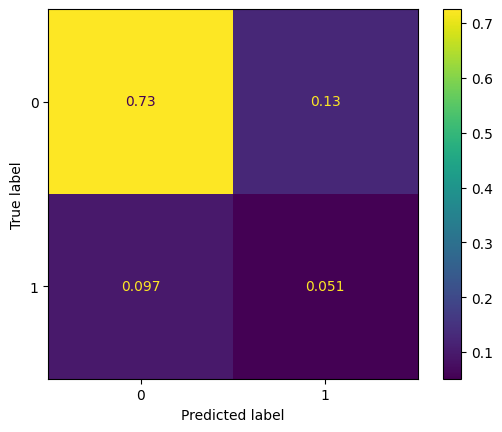

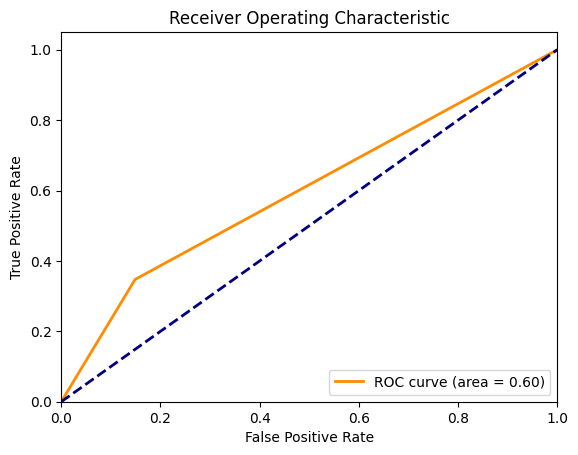

In [166]:
df_smote_allnewcol_ = evaluate_models(smote_newcols_model_train , X_test_newcol,y_test_newcol)

In [167]:
df_smote_allnewcol_

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8350,0.314189,0.619829,0.422727,0.360465
1,GradientBoostingClassifier,0.8025,0.477027,0.668032,0.370215,0.416888
2,ExtraTreesClassifier,0.8287,0.318919,0.618086,0.401020,0.355288
3,LogisticRegression,0.7335,0.685135,0.713518,0.315593,0.432133
4,XGBClassifier,0.8471,0.181757,0.572216,0.458262,0.260281
5,SVM,0.7169,0.717568,0.717176,0.305612,0.428658
6,Naive Bayes,0.4075,0.868243,0.597854,0.183179,0.302531
7,Decision Tree,0.7766,0.347297,0.599236,0.288440,0.315144


 
* ### df_smote_onlynewcol_ is after we keep only new cols sine they are related to existing ones. Removed, is_weekday,flight_day and all wants column

In [161]:
df_smote_onlynewcol_

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8343,0.327027,0.624722,0.422707,0.368762
1,GradientBoostingClassifier,0.7899,0.523649,0.679899,0.356978,0.424541
2,ExtraTreesClassifier,0.8244,0.345946,0.626729,0.393846,0.368345
3,LogisticRegression,0.7322,0.683784,0.712197,0.314091,0.430455
4,XGBClassifier,0.8445,0.193243,0.575436,0.442040,0.268923
5,SVM,0.7146,0.729054,0.720572,0.305493,0.430567
6,Naive Bayes,0.4070,0.871622,0.598956,0.183499,0.303173
7,Decision Tree,0.7835,0.364189,0.610264,0.305729,0.332408


### Insight:
* There is slight improvement if we remove redundant columns after we add new columns.

## Lets try modelling outliers removed and normally distributed data

In [89]:
df_train_outlier = pd.read_csv('df_train_smote_newcols_outlier.csv')
df_train_outlier.head()

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,is_weekday,is_weekend,booking_complete
0,-1.133934,-0.424772,-0.577526,-1.178671,0.644195,0.720257,0.090844,1.040042,0.605191,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0
1,-0.886377,-0.904269,-0.577526,-0.598586,0.606556,-0.569979,0.592505,1.040042,1.602669,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0
2,-1.248787,-0.438141,-0.577526,0.951578,-0.812309,-0.017021,0.090844,-0.436748,-0.392287,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,-0.517826,-0.904269,0.405175,0.398080,1.068398,-0.569979,0.090844,1.040042,0.605191,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0
4,-0.927019,1.268018,-0.577526,-1.957457,-1.076154,0.351618,-0.410817,1.040042,1.602669,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0


In [90]:
X_train_smotenewcoloutlier,y_train_smotenewcoloutlier = df_train_outlier.drop('booking_complete',axis=1),df_train_outlier['booking_complete']

In [91]:
df_test_outlier = pd.read_csv('df_test_processed_newcols_outlier.csv')


In [92]:
X_test_smotenewcoloutlier,y_test_smotenewcoloutlier = df_test_outlier.drop('booking_complete',axis=1),df_test_outlier['booking_complete']

In [93]:
model_outlier = train_models(models,X_train_smotenewcoloutlier,y_train_smotenewcoloutlier)

C:\Users\Swamesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for RandomForestClassifier:
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8520
           1       0.43      0.31      0.36      1478

    accuracy                           0.84      9998
   macro avg       0.66      0.62      0.63      9998
weighted avg       0.82      0.84      0.83      9998



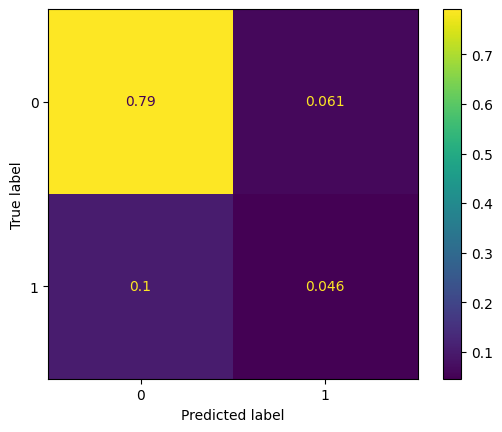

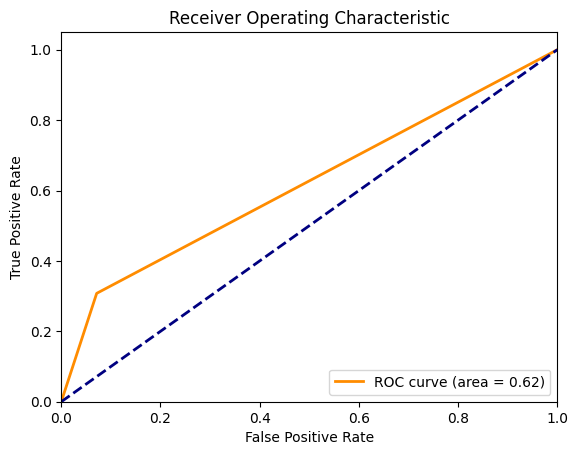

Confusion Matrix for GradientBoostingClassifier:
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      8520
           1       0.35      0.49      0.41      1478

    accuracy                           0.79      9998
   macro avg       0.63      0.67      0.64      9998
weighted avg       0.82      0.79      0.80      9998



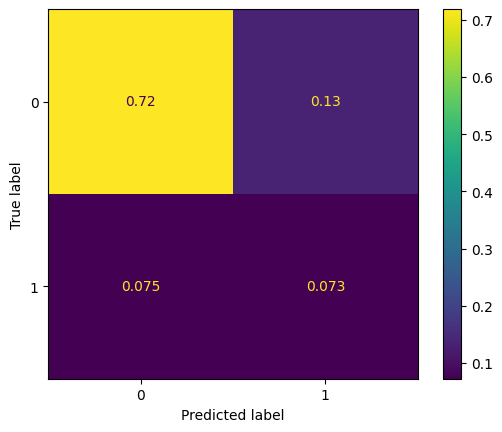

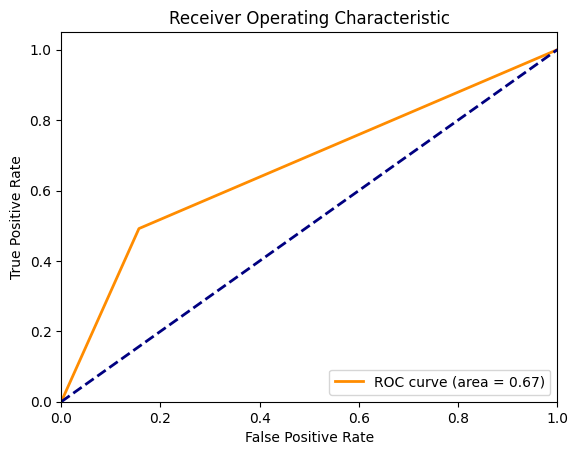

Confusion Matrix for ExtraTreesClassifier:
Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8520
           1       0.41      0.32      0.36      1478

    accuracy                           0.83      9998
   macro avg       0.65      0.62      0.63      9998
weighted avg       0.82      0.83      0.82      9998



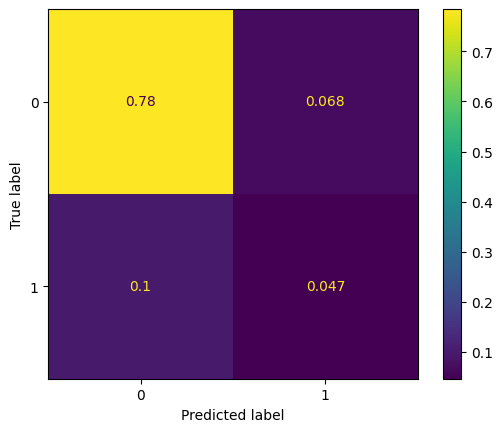

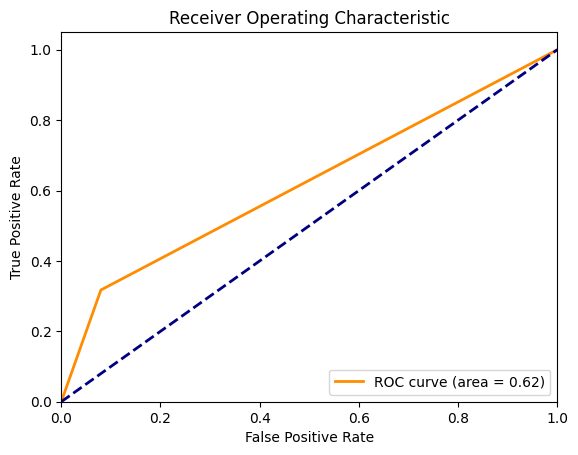

Confusion Matrix for LogisticRegression:
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      8520
           1       0.31      0.70      0.43      1478

    accuracy                           0.73      9998
   macro avg       0.62      0.72      0.63      9998
weighted avg       0.84      0.73      0.76      9998



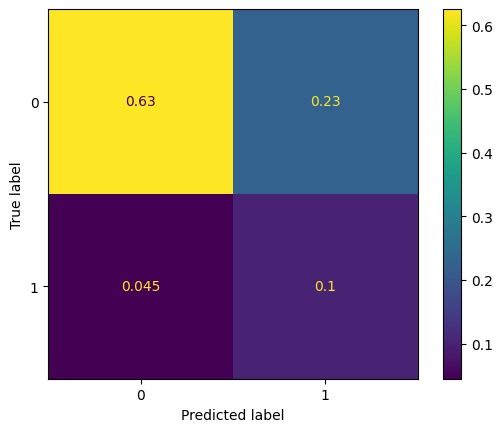

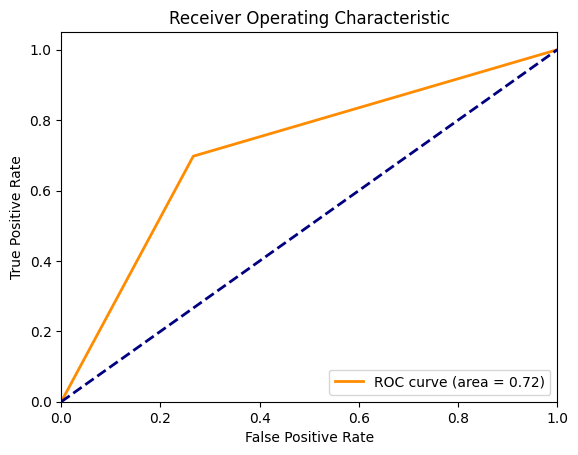

Confusion Matrix for XGBClassifier:
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8520
           1       0.46      0.21      0.28      1478

    accuracy                           0.85      9998
   macro avg       0.67      0.58      0.60      9998
weighted avg       0.81      0.85      0.82      9998



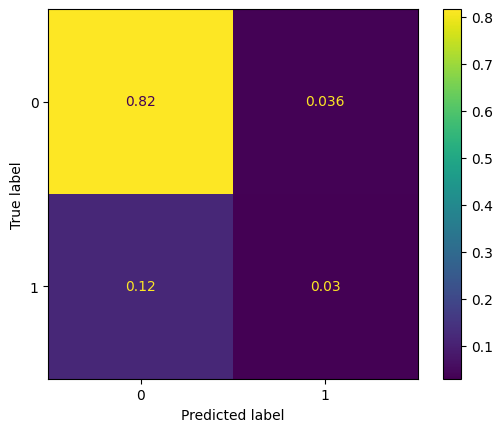

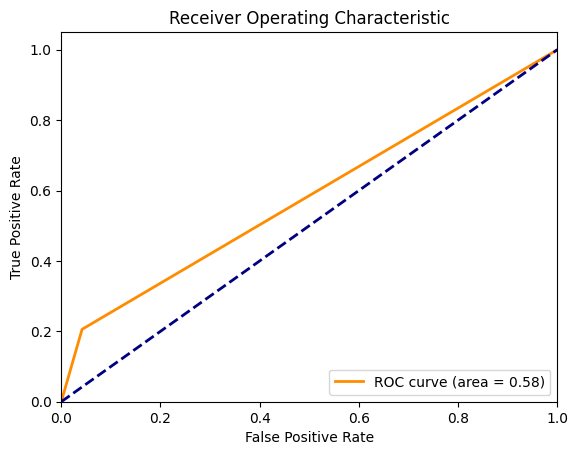

Confusion Matrix for SVM:
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81      8520
           1       0.30      0.71      0.43      1478

    accuracy                           0.72      9998
   macro avg       0.62      0.71      0.62      9998
weighted avg       0.84      0.72      0.75      9998



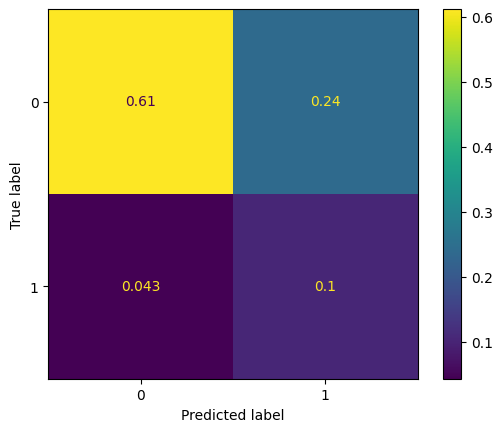

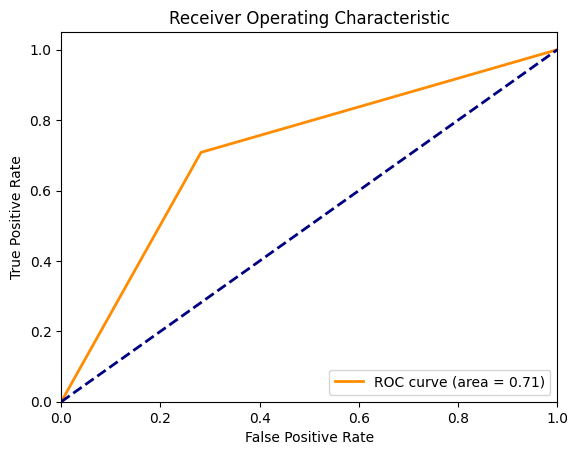

Confusion Matrix for Naive Bayes:
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.32      0.48      8520
           1       0.19      0.89      0.31      1478

    accuracy                           0.41      9998
   macro avg       0.56      0.61      0.39      9998
weighted avg       0.83      0.41      0.46      9998



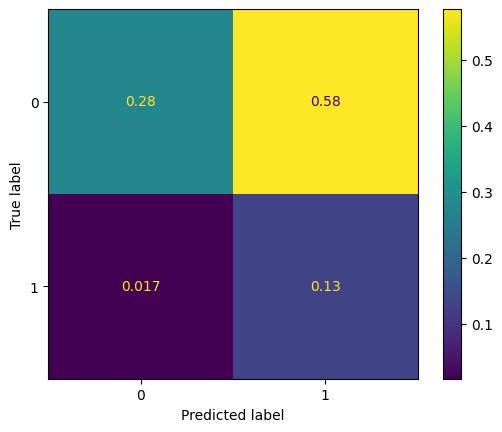

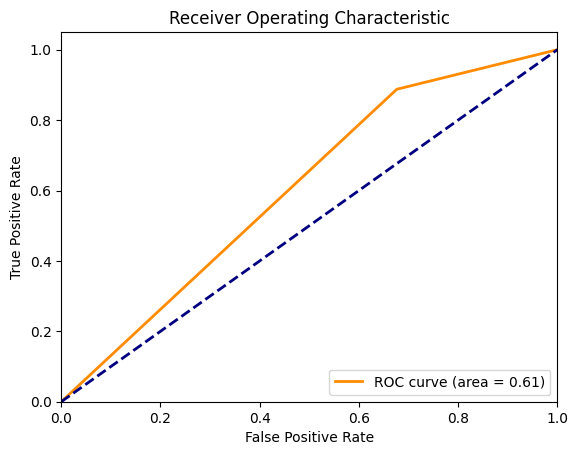

Confusion Matrix for Decision Tree:
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      8520
           1       0.29      0.37      0.33      1478

    accuracy                           0.77      9998
   macro avg       0.59      0.61      0.59      9998
weighted avg       0.80      0.77      0.78      9998



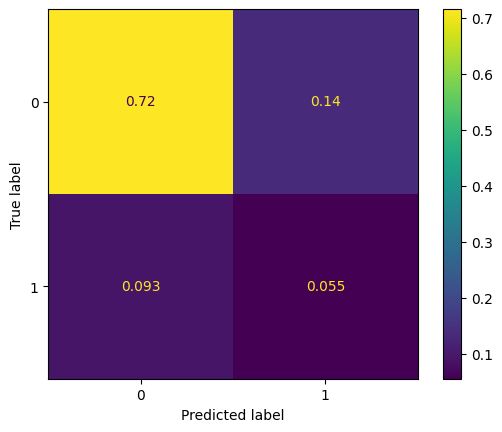

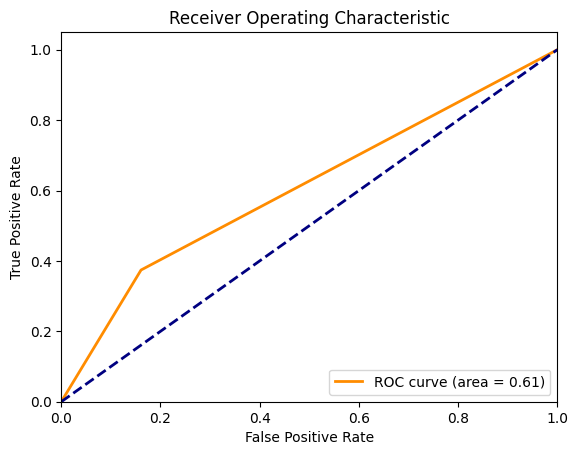

In [95]:
df_outlier_report = evaluate_models(model_outlier,X_test_smotenewcoloutlier,y_test_smotenewcoloutlier)

## Comparing past few reports

* Result after removing outlier having new cols and smote

In [96]:
df_outlier_report

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.836867,0.307848,0.618243,0.428034,0.358127
1,GradientBoostingClassifier,0.791458,0.491881,0.667654,0.352741,0.410851
2,ExtraTreesClassifier,0.831066,0.317321,0.618754,0.408181,0.357061
3,LogisticRegression,0.728446,0.697564,0.715684,0.312519,0.431652
4,XGBClassifier,0.846869,0.205683,0.581891,0.459909,0.284245
5,SVM,0.716843,0.708390,0.713350,0.303742,0.425178
6,Naive Bayes,0.406881,0.887686,0.605580,0.185415,0.306757
7,Decision Tree,0.770454,0.374154,0.606678,0.287572,0.325198


* Result after having only new cols and smote

In [169]:
df_smote_onlynewcol_

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8343,0.327027,0.624722,0.422707,0.368762
1,GradientBoostingClassifier,0.7899,0.523649,0.679899,0.356978,0.424541
2,ExtraTreesClassifier,0.8244,0.345946,0.626729,0.393846,0.368345
3,LogisticRegression,0.7322,0.683784,0.712197,0.314091,0.430455
4,XGBClassifier,0.8445,0.193243,0.575436,0.442040,0.268923
5,SVM,0.7146,0.729054,0.720572,0.305493,0.430567
6,Naive Bayes,0.4070,0.871622,0.598956,0.183499,0.303173
7,Decision Tree,0.7835,0.364189,0.610264,0.305729,0.332408


* no new cols BUT smote

In [99]:
results_df_smote

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8375,0.308108,0.618784,0.431410,0.359480
1,GradientBoostingClassifier,0.8039,0.493919,0.675833,0.376222,0.427111
2,ExtraTreesClassifier,0.8358,0.312162,0.619461,0.425414,0.360094
3,LogisticRegression,0.7342,0.687162,0.714767,0.316625,0.433504
4,XGBClassifier,0.8502,0.185135,0.575431,0.484099,0.267840


* No new cols, no smote

In [98]:
results_df

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8568,0.167568,0.572047,0.553571,0.257261
1,GradientBoostingClassifier,0.8568,0.089189,0.539665,0.611111,0.155660
2,ExtraTreesClassifier,0.8485,0.183108,0.573596,0.469671,0.263491
3,LogisticRegression,0.8493,0.107432,0.542801,0.460870,0.174247
4,XGBClassifier,0.8518,0.147297,0.560738,0.497717,0.227320


## Insights:
* We tried few combination of datasets that had smote,new cols,outlier removal,etc.
* from the reports above we can see that dataset having only new cols and SMOTE performed better than the rest, especially a bit better than outlier removed one.
* Not much of a difference if you add new cols or not
* Random forest,SVM, Logistic regression and Gradient boost did well.
* Naive bayes has good recall and ROC score but accuracy is not good

## scaling all features of newcol_smote

In [135]:
df_trainall_scale = df_train_smote_newcol.copy()

In [133]:
df_trainall_scale.columns

Index(['route', 'booking_origin', 'num_passengers', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration',
       'sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'booking_complete'],
      dtype='object')

In [134]:
df_trainall_scale.head(2)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,1.0,0.0,1.0,0.0,0.0,1.0,0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,0.0,0.0,1.0,1.0,0.0,0.0,1


In [111]:
df_testall_scale = df_test_newcol.copy()

In [116]:
df_testall_scale.drop(['wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals','is_weekday'],axis=1,inplace=True)

In [117]:
X_train,y_train = df_trainall_scale.drop('booking_complete',axis=1),df_trainall_scale['booking_complete']
X_test,y_test = df_testall_scale.drop('booking_complete',axis=1),df_testall_scale['booking_complete']

In [119]:
X_train.shape,X_test.shape

((68004, 13), (10000, 13))

In [120]:
X_train.head(2)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,is_weekend
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,-0.388061,1.0,0.0,1.0,1.0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,-0.388061,0.0,0.0,1.0,0.0


In [118]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [121]:
sl = StandardScaler()

X_train[['sales_channel_Mobile','trip_type_OneWay','trip_type_RoundTrip','is_weekend']] = sl.fit_transform(X_train[['sales_channel_Mobile','trip_type_OneWay','trip_type_RoundTrip','is_weekend']])

In [126]:
X_test[['sales_channel_Mobile','trip_type_OneWay','trip_type_RoundTrip','is_weekend']] = sl.transform(X_test[['sales_channel_Mobile','trip_type_OneWay','trip_type_RoundTrip','is_weekend']])

In [128]:
experiment_allstandard_models = train_models(models, X_train, y_train)

Confusion Matrix for RandomForestClassifier:
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8520
           1       0.44      0.32      0.37      1480

    accuracy                           0.84     10000
   macro avg       0.66      0.62      0.64     10000
weighted avg       0.82      0.84      0.83     10000



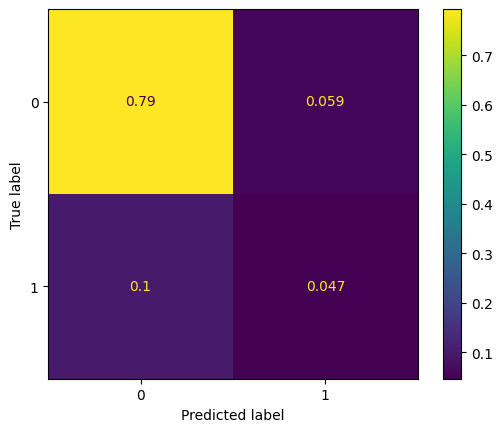

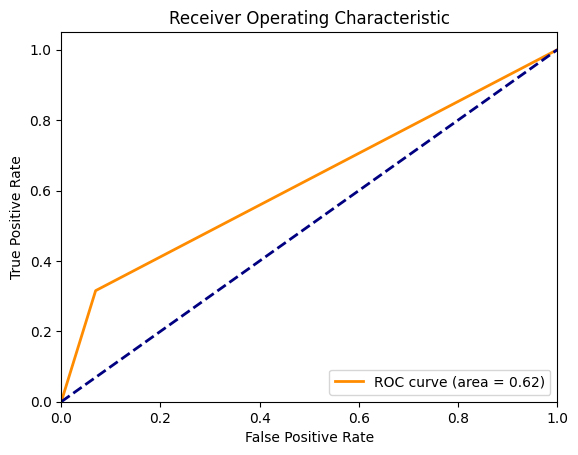

Confusion Matrix for GradientBoostingClassifier:
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      8520
           1       0.37      0.48      0.42      1480

    accuracy                           0.80     10000
   macro avg       0.64      0.67      0.65     10000
weighted avg       0.83      0.80      0.81     10000



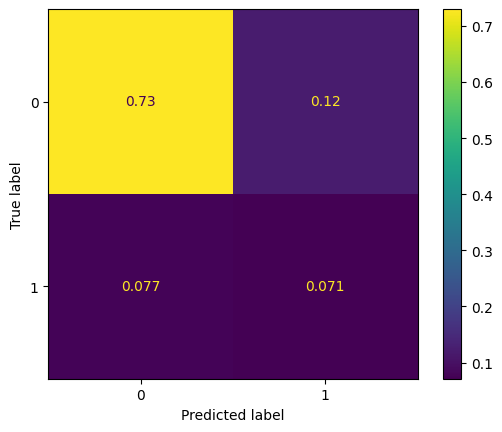

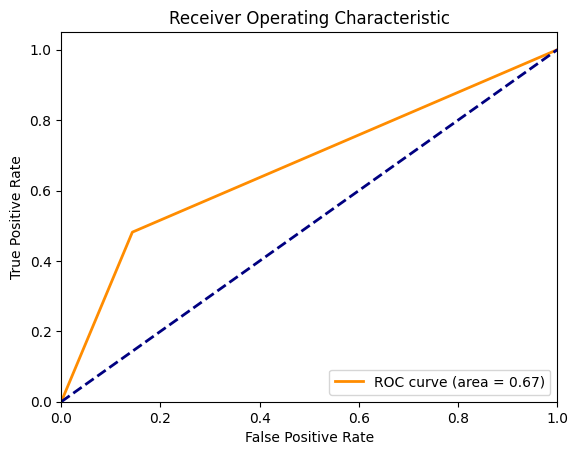

Confusion Matrix for ExtraTreesClassifier:
Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8520
           1       0.40      0.31      0.35      1480

    accuracy                           0.83     10000
   macro avg       0.64      0.62      0.63     10000
weighted avg       0.81      0.83      0.82     10000



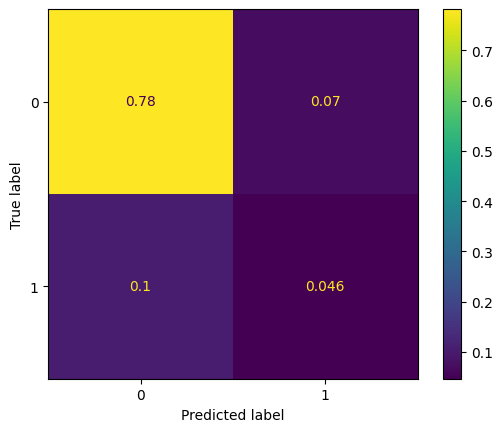

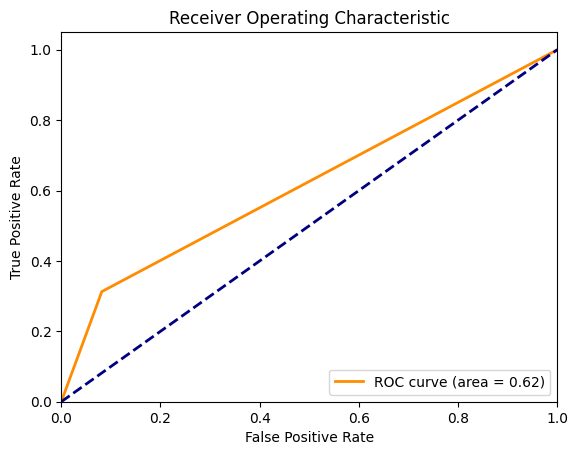

Confusion Matrix for LogisticRegression:
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      8520
           1       0.31      0.69      0.43      1480

    accuracy                           0.73     10000
   macro avg       0.62      0.71      0.63     10000
weighted avg       0.84      0.73      0.77     10000



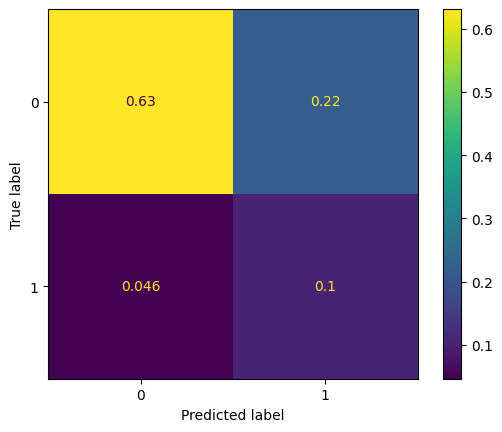

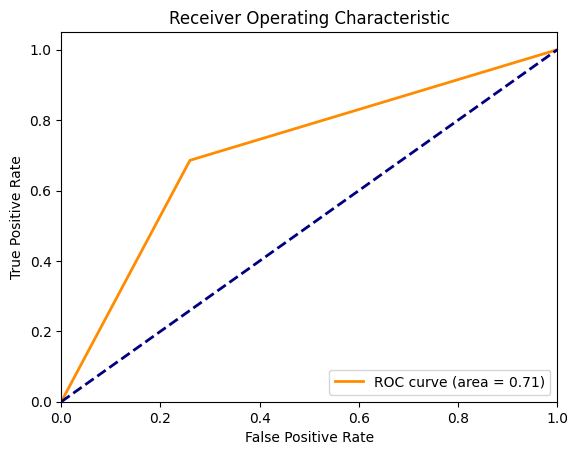

Confusion Matrix for XGBClassifier:
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      8520
           1       0.46      0.18      0.26      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.57      0.59     10000
weighted avg       0.81      0.85      0.82     10000



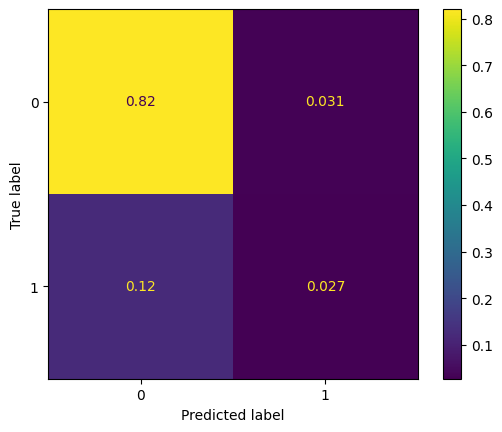

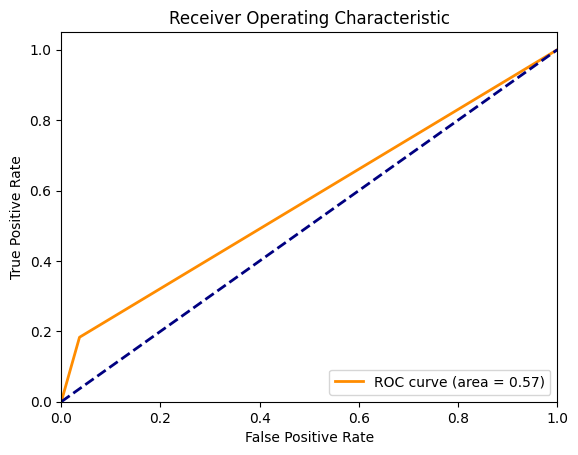

Confusion Matrix for SVM:
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      8520
           1       0.31      0.71      0.43      1480

    accuracy                           0.72     10000
   macro avg       0.62      0.72      0.62     10000
weighted avg       0.84      0.72      0.76     10000



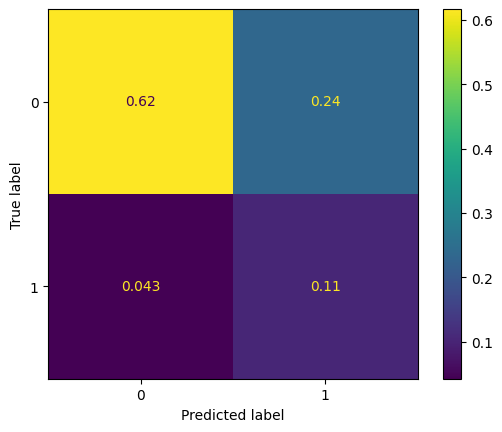

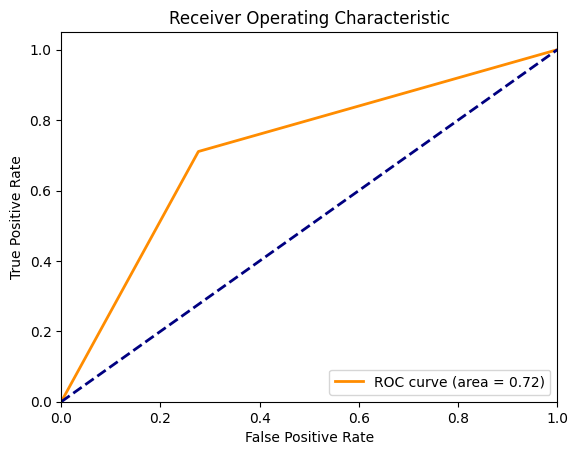

Confusion Matrix for Naive Bayes:
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.33      0.48      8520
           1       0.18      0.87      0.30      1480

    accuracy                           0.41     10000
   macro avg       0.56      0.60      0.39     10000
weighted avg       0.82      0.41      0.46     10000



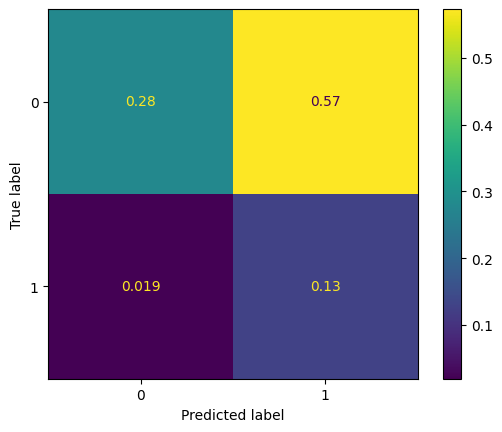

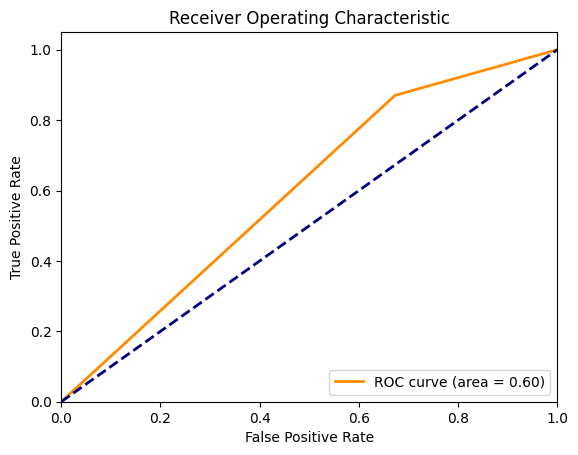

Confusion Matrix for Decision Tree:
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      8520
           1       0.30      0.36      0.33      1480

    accuracy                           0.78     10000
   macro avg       0.59      0.61      0.60     10000
weighted avg       0.80      0.78      0.79     10000



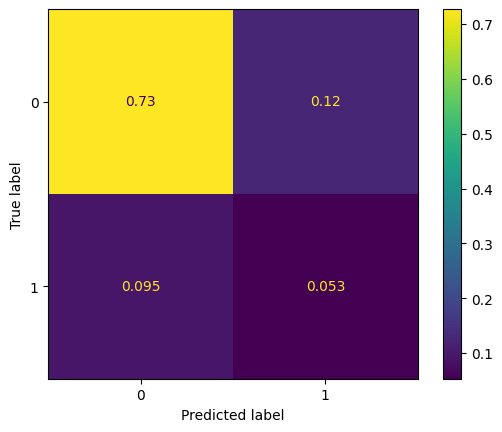

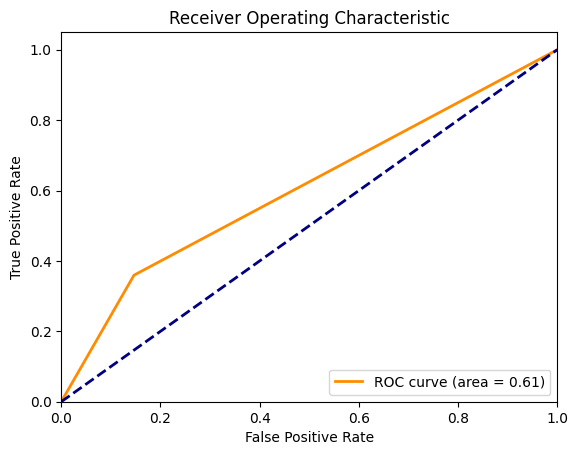

In [129]:
df_experiment_allstandard = evaluate_models(experiment_allstandard_models,X_test,y_test)

In [130]:
df_experiment_allstandard

,Model,Accuracy,Recall,ROC AUC,Precision,F1 Score
0,RandomForestClassifier,0.8397,0.315541,0.623146,0.441816,0.368151
1,GradientBoostingClassifier,0.8012,0.481757,0.669223,0.368666,0.417692
2,ExtraTreesClassifier,0.8287,0.312838,0.615574,0.399482,0.350890
3,LogisticRegression,0.7325,0.685811,0.713211,0.314729,0.431456
4,XGBClassifier,0.8478,0.183108,0.573186,0.464041,0.262597
5,SVM,0.7217,0.710811,0.717201,0.308776,0.430530
6,Naive Bayes,0.4075,0.870270,0.598691,0.183450,0.303023
7,Decision Tree,0.7803,0.359459,0.606432,0.298709,0.326280


### Scaling all features of og_smote

In [136]:
train_allscale_ogsmote = df_train_smote.copy()

In [137]:
test_allscale_ogsmote = df_test_og.copy()

In [140]:
X_train,y_train = train_allscale_ogsmote.drop('booking_complete',axis=1),train_allscale_ogsmote['booking_complete']
X_test,y_test = test_allscale_ogsmote.drop('booking_complete',axis=1),test_allscale_ogsmote['booking_complete']

In [141]:
experiment_allstandard_models_ogsmote = train_models(models, X_train, y_train)

Confusion Matrix for RandomForestClassifier:
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8520
           1       0.43      0.31      0.36      1480

    accuracy                           0.84     10000
   macro avg       0.66      0.62      0.63     10000
weighted avg       0.82      0.84      0.83     10000



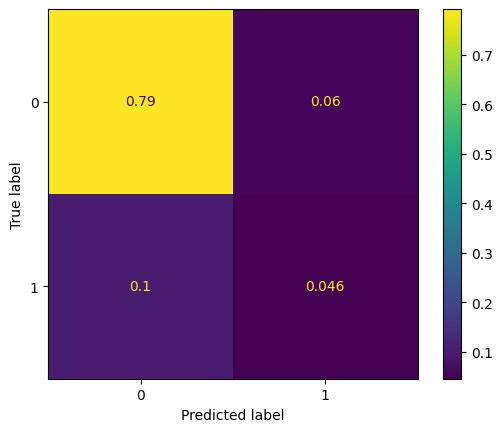

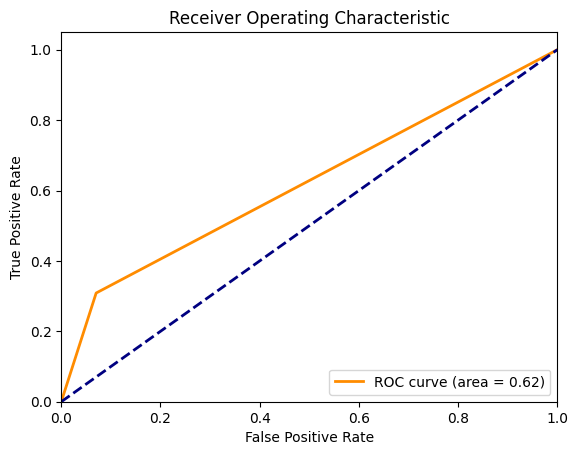

Confusion Matrix for GradientBoostingClassifier:
Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      8520
           1       0.38      0.49      0.43      1480

    accuracy                           0.80     10000
   macro avg       0.64      0.68      0.65     10000
weighted avg       0.83      0.80      0.81     10000



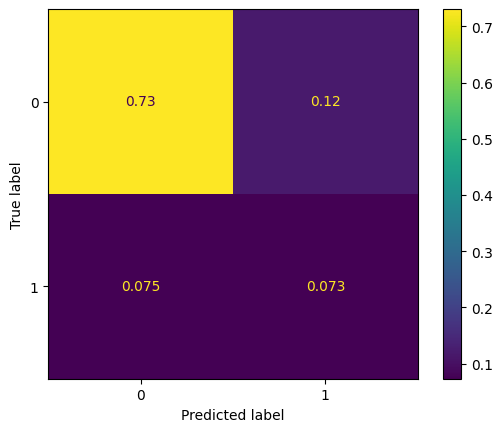

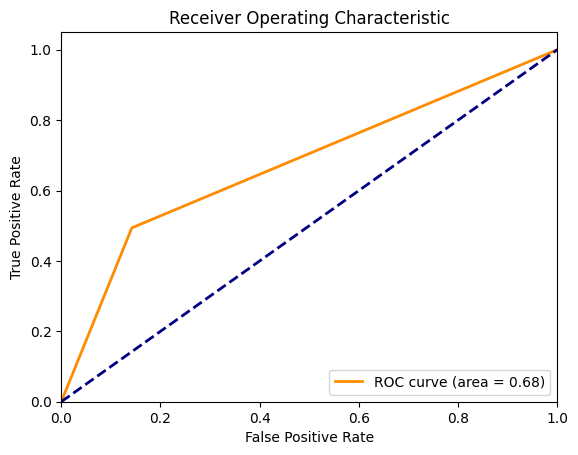

Confusion Matrix for ExtraTreesClassifier:
Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8520
           1       0.43      0.31      0.36      1480

    accuracy                           0.84     10000
   macro avg       0.66      0.62      0.63     10000
weighted avg       0.82      0.84      0.82     10000



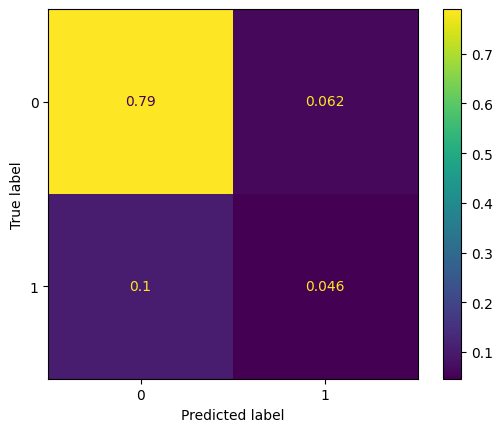

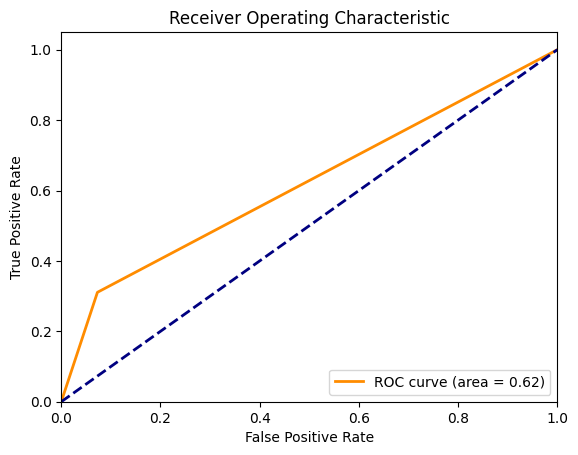

Confusion Matrix for LogisticRegression:
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83      8520
           1       0.32      0.69      0.43      1480

    accuracy                           0.73     10000
   macro avg       0.62      0.71      0.63     10000
weighted avg       0.84      0.73      0.77     10000



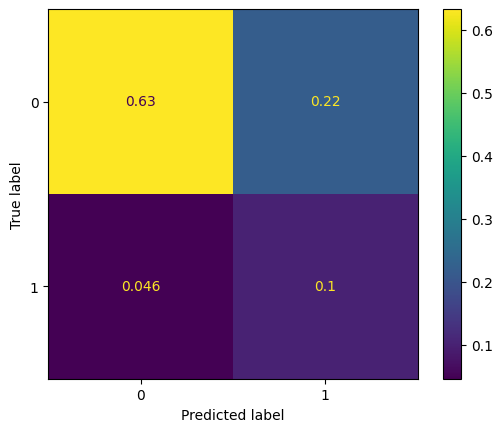

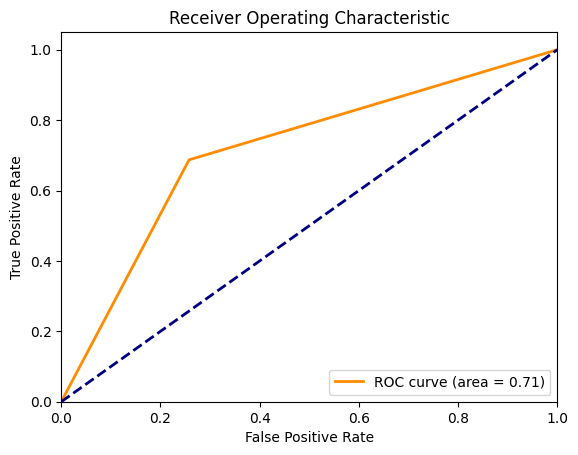

Confusion Matrix for XGBClassifier:
Classification Report for XGBClassifier:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      8520
           1       0.48      0.19      0.27      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.58      0.59     10000
weighted avg       0.81      0.85      0.82     10000



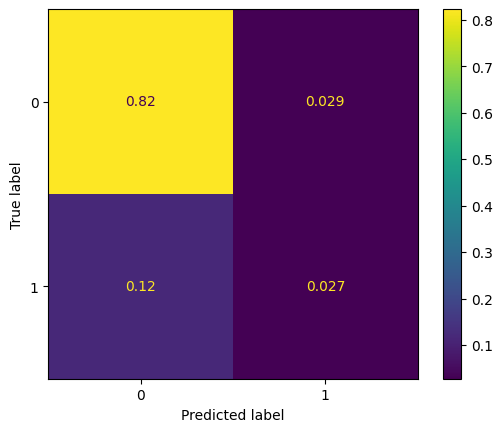

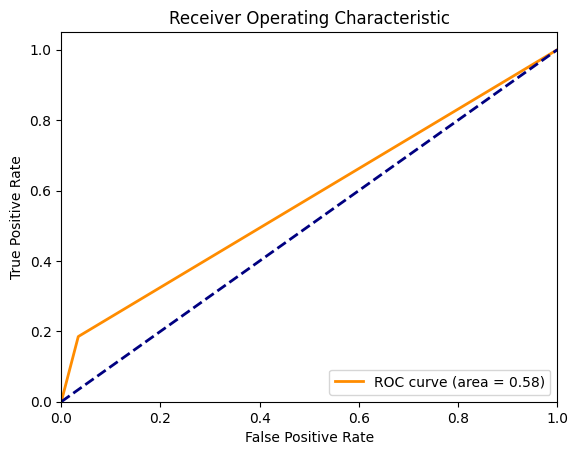

Confusion Matrix for SVM:
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      0.72      0.81      8520
           1       0.31      0.72      0.43      1480

    accuracy                           0.72     10000
   macro avg       0.62      0.72      0.62     10000
weighted avg       0.84      0.72      0.76     10000



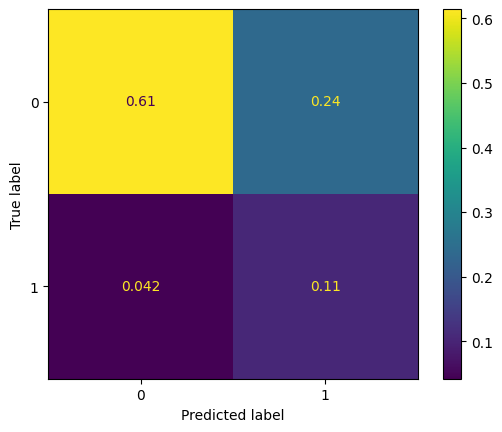

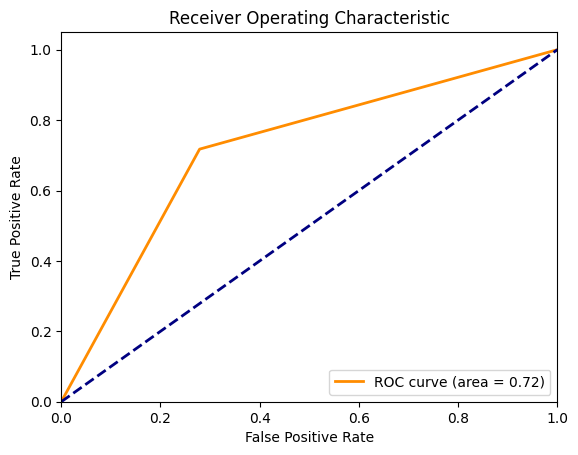

Confusion Matrix for Naive Bayes:
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.94      0.34      0.50      8520
           1       0.19      0.87      0.31      1480

    accuracy                           0.42     10000
   macro avg       0.56      0.61      0.40     10000
weighted avg       0.83      0.42      0.47     10000



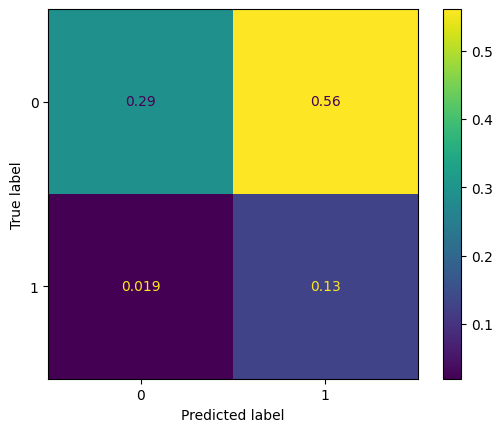

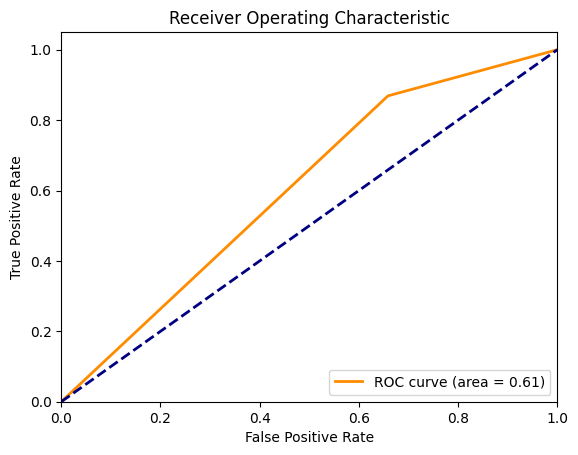

Confusion Matrix for Decision Tree:
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      8520
           1       0.29      0.37      0.32      1480

    accuracy                           0.77     10000
   macro avg       0.59      0.61      0.59     10000
weighted avg       0.80      0.77      0.78     10000



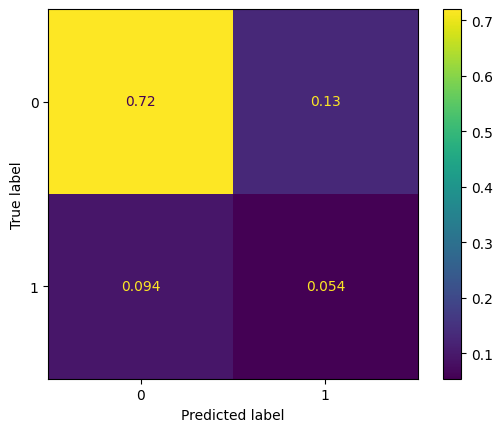

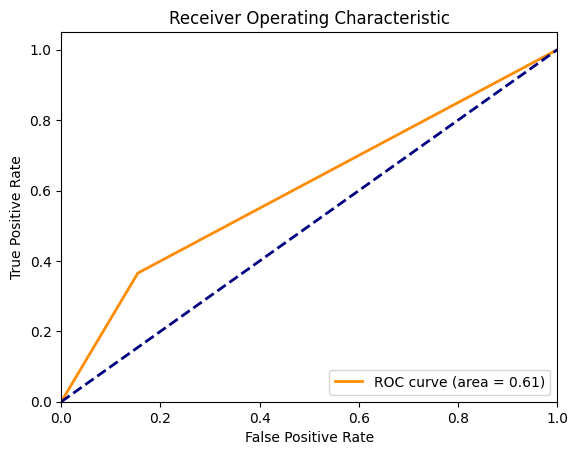

In [142]:
df_experiment_allstandard_models_ogsmote = evaluate_models(experiment_allstandard_models_ogsmote,X_test,y_test)

## Insight:
* ### It doesn't make a big difference if use standard scale all features , with or without new cols.